In [ ]:
!pip install ipywidgets
!pip install ultralytics==8.0.196


In [18]:
from ipywidgets import widgets, FileUpload, VBox, Button, Output
from IPython.display import display, Image
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt


In [23]:
# Define functions
def on_file_upload(change):
    os.makedirs('/content/runs/segment/upload_output', exist_ok=True)
    custom_model = YOLO('/content/best(2).pt')  # Load your custom-trained model
    for name, file_info in uploader.value.items():
        with open(name, 'wb') as f:
            f.write(file_info['content'])
        img_path = os.path.join('/content/', name)
        results = custom_model(img_path)
        for result in results:
            plt.figure(figsize=(10, 10))
            plt.imshow(result.plot())
            plt.axis('off')
            output_img_path = os.path.join('/content/runs/segment/upload_output/', name)
            plt.savefig(output_img_path)
            plt.close()

        # Display the output image
        output_img_path = os.path.join('/content/runs/segment/upload_output/', name)
        display(Image(filename=output_img_path, width=600))

def on_display_results(b):
    results_dir = '/content/runs/segment/upload_output'
    with output_detect:
        output_detect.clear_output()
        for image_file in os.listdir(results_dir):
            if image_file.endswith(('.jpg', '.jpeg', '.png')):  # Check if it's an image file
                image_path = os.path.join(results_dir, image_file)
                display(Image(filename=image_path, width=600))



image 1/1 /content/1-3-46-670589-33-1-63703718086101119100001-4867318355234768205_png.rf.bf4280355f677054f60e00c888ea1861.jpg: 800x800 3 kidneystones, 1296.4ms
Speed: 7.5ms preprocess, 1296.4ms inference, 29.4ms postprocess per image at shape (1, 3, 800, 800)


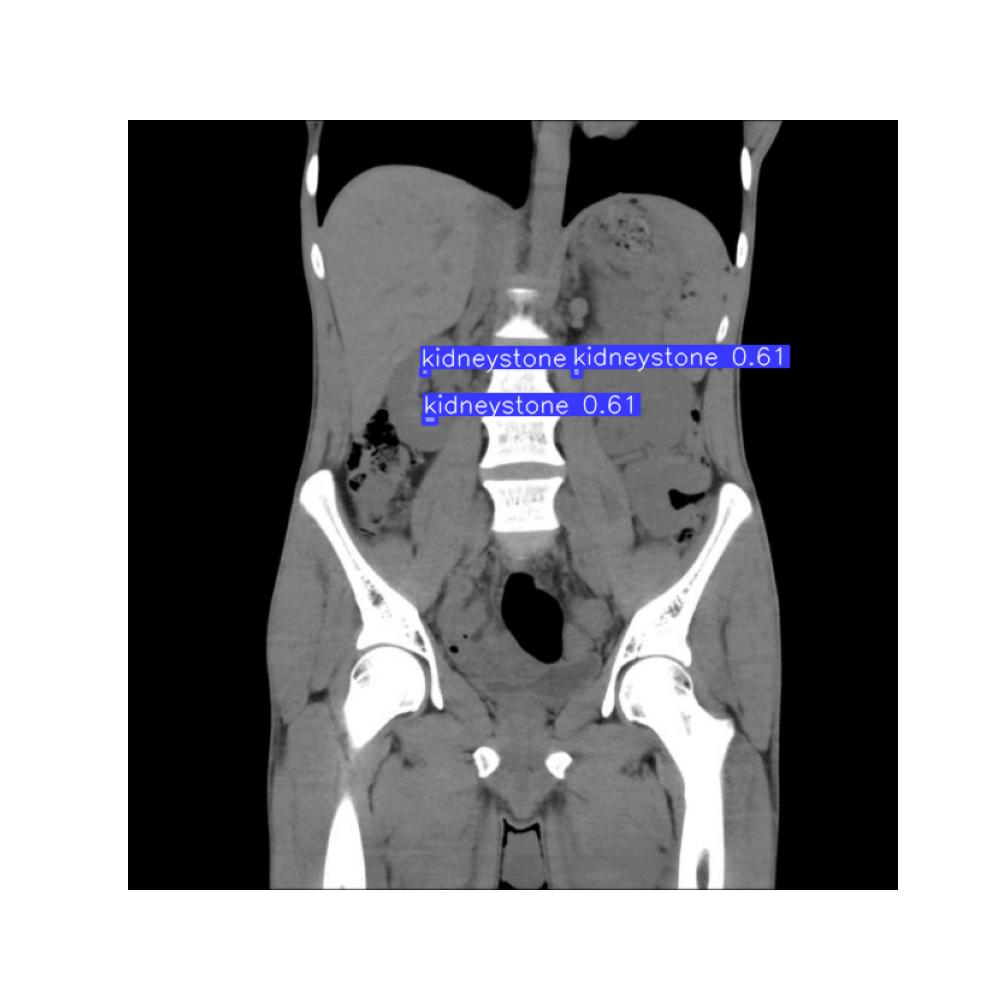

In [32]:
# Create GUI elements for uploading, detecting, and displaying results
uploader = FileUpload(accept='.jpg, .jpeg, .png', multiple=True)
uploader.observe(on_file_upload, names='value')

display_button = Button(description='Display Results')
display_button.on_click(on_display_results)
output_detect = Output()

detect_section = VBox([uploader, display_button, output_detect])
display(detect_section)